In [123]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

In [124]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [125]:
len(X_train)

60000

In [126]:
len(X_test)

10000

In [127]:
X_train[0].shape

(28, 28)

In [128]:
X_train[1].shape

(28, 28)

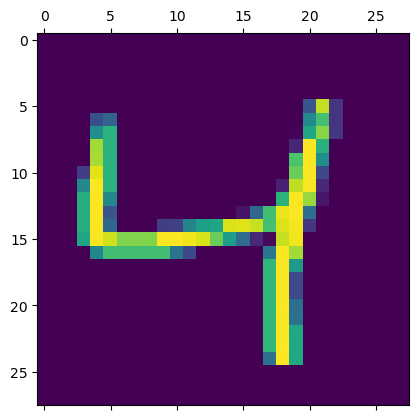

In [129]:
plt.matshow(X_train[2])

In [130]:
y_train[2]

4

In [131]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [132]:
X_train.shape

(60000, 28, 28)

In [137]:
X_train = X_train / 255
X_test = X_test / 255

In [138]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [139]:
X_train_flattened.shape

(60000, 784)

In [140]:
X_test_flattened.shape

(10000, 784)

In [141]:
model = keras.Sequential([
        keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8117 - loss: 0.7244
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9127 - loss: 0.3094
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9196 - loss: 0.2818
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9246 - loss: 0.2723
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9247 - loss: 0.2630


In [142]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9154 - loss: 0.3019


[0.26585811376571655, 0.9253000020980835]

In [143]:
model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.3134731e-02, 3.1294485e-07, 6.0935769e-02, ..., 9.9985194e-01,
        9.1857523e-02, 6.7005265e-01],
       [4.6277574e-01, 6.3932044e-03, 9.9929559e-01, ..., 1.3597779e-12,
        1.6179271e-01, 3.3643126e-09],
       [5.0982327e-04, 9.9157351e-01, 6.0114372e-01, ..., 1.3814802e-01,
        3.1309077e-01, 5.0077129e-02],
       ...,
       [4.2685256e-06, 4.2080510e-06, 1.3392487e-03, ..., 3.8573298e-01,
        4.7112370e-01, 8.1935400e-01],
       [1.3767312e-04, 1.7884166e-04, 1.3251927e-04, ..., 5.8401100e-05,
        6.4135802e-01, 1.3231157e-04],
       [1.5810598e-02, 4.2957701e-10, 1.5927064e-01, ..., 6.0538078e-08,
        2.0218303e-04, 1.2186933e-06]], dtype=float32)

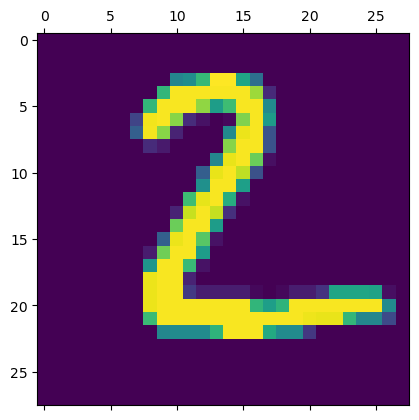

In [144]:
plt.matshow(X_test[1])

In [145]:
y_pred = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [152]:
y_pred[1]

array([4.6277574e-01, 6.3932044e-03, 9.9929559e-01, 4.1817597e-01,
       6.4692884e-10, 8.7193549e-01, 9.1085887e-01, 1.3597779e-12,
       1.6179271e-01, 3.3643126e-09], dtype=float32)

In [153]:
np.argmax(y_pred[1])

2

In [157]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [158]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [165]:
cm = tf.math.confusion_matrix(labels = y_test,predictions=y_pred_labels)


Text(95.72222222222221, 0.5, 'Truth')

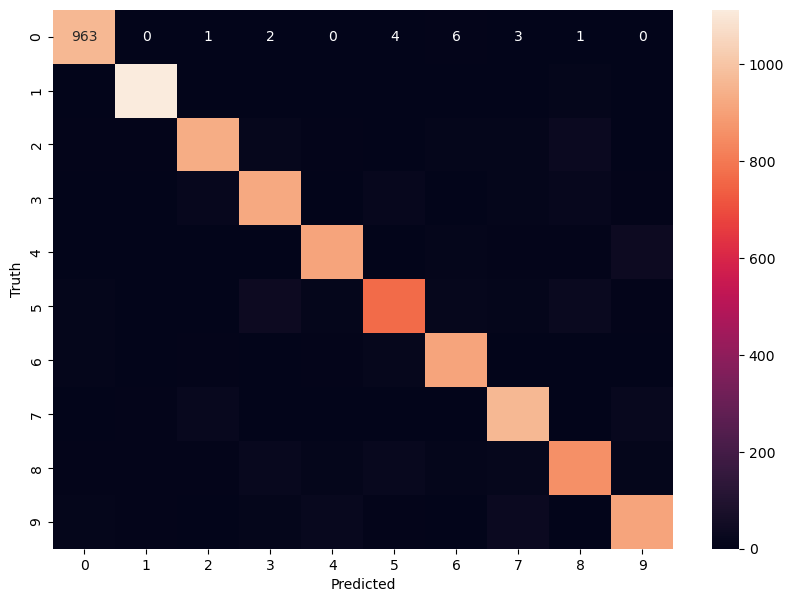

In [167]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt ='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')